⚡ PROCESANDO: BegInvFINAL12312016_clean.csv
📊 Total Registros: 206,529
💰 Precio Promedio: $22.25


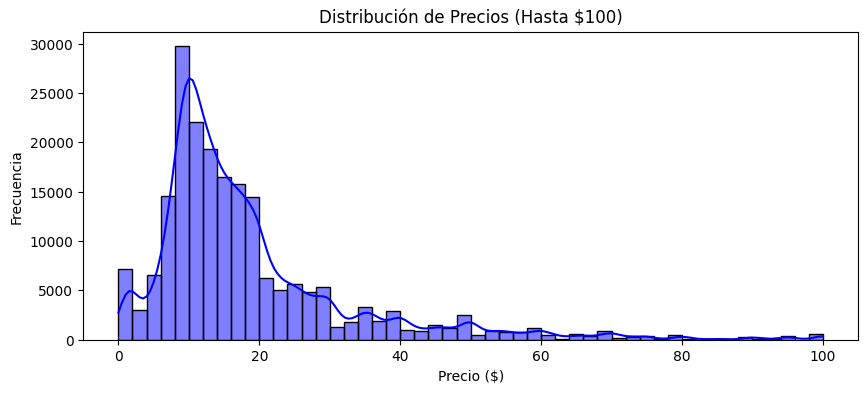


🏪 CALCULANDO RANKING DE TIENDAS...


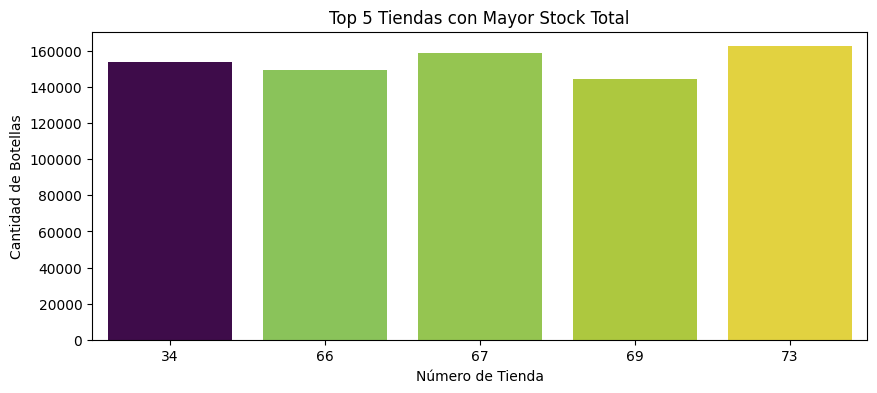

🏆 Ranking Numérico:
Store
73    162551
67    158996
34    153852
66    149314
69    144255
Name: onHand, dtype: int64

✅ Reporte finalizado.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generar_reporte_automatico(ruta_del_archivo, limite_precio=100):
    
    print(f"⚡ PROCESANDO: {ruta_del_archivo}")
    # Cargamos el archivo
    df = pd.read_csv(ruta_del_archivo)
    
    # --- PARTE 1: Precios ---
    print(f"📊 Total Registros: {len(df):,}")
    print(f"💰 Precio Promedio: ${df['Price'].mean():.2f}")
    
    plt.figure(figsize=(10, 4))
    datos_grafico = df[df['Price'] <= limite_precio]
    sns.histplot(datos_grafico['Price'], bins=50, color='blue', kde=True)
    plt.title(f'Distribución de Precios (Hasta ${limite_precio})')
    plt.xlabel('Precio ($)')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # --- PARTE 2: Top 5 Tiendas  ---
    print("\n🏪 CALCULANDO RANKING DE TIENDAS...")
    
    # Agrupamos por Tienda (Store) y sumamos el Stock (onHand)
    top_tiendas = df.groupby('Store')['onHand'].sum().sort_values(ascending=False).head(5)
    
    plt.figure(figsize=(10, 4))
    
    # Agregamos hue=top_tiendas.index y legend=False, para evitar un FutureWarning
    sns.barplot(
        x=top_tiendas.index, 
        y=top_tiendas.values, 
        hue=top_tiendas.index,  # Colorea según la tienda
        palette="viridis", 
        legend=False            # Oculta la leyenda redundante
    )
    
    plt.title('Top 5 Tiendas con Mayor Stock Total')
    plt.xlabel('Número de Tienda')
    plt.ylabel('Cantidad de Botellas')
    plt.show()
    
    print("🏆 Ranking Numérico:")
    print(top_tiendas)
    print("\n✅ Reporte finalizado.")

# --- PRUEBA FINAL ---
generar_reporte_automatico('BegInvFINAL12312016_clean.csv')